<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1:-Gather-Inputs" data-toc-modified-id="Step-1:-Gather-Inputs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Step 1: Gather Inputs</a></span><ul class="toc-item"><li><span><a href="#Step-1.1:-Loading-in-google-doc:" data-toc-modified-id="Step-1.1:-Loading-in-google-doc:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Step 1.1: Loading in google doc:</a></span></li></ul></li><li><span><a href="#Step-2:-Run-the-Cluster-Finder-Wrapper" data-toc-modified-id="Step-2:-Run-the-Cluster-Finder-Wrapper-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 2: Run the Cluster Finder Wrapper</a></span></li><li><span><a href="#Step-3:-Run-Cluster-Finder" data-toc-modified-id="Step-3:-Run-Cluster-Finder-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step 3: Run Cluster Finder</a></span></li><li><span><a href="#Cluster-Crossmatching" data-toc-modified-id="Cluster-Crossmatching-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cluster Crossmatching</a></span></li><li><span><a href="#Source-Subtraction" data-toc-modified-id="Source-Subtraction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Source Subtraction</a></span></li></ul></div>

In [1]:
import sys
sys.path.append("/home/kaylank/pipelines/")
import clusterfinder
import clusterfinder_wrapper

import importlib
importlib.reload(clusterfinder)

sys.path.append("/home/kaylank/imports")
from imports import *

# Step 1: Gather Inputs






For my own convenience, the cluster finder reads in the files that will be used for cluster finding from a google doc. An example google doc is given below:<br><br>

https://docs.google.com/spreadsheets/d/1UtTrfYu7b_NMYQuqo10HpE_IDDOWXM9pFxbQNKHn5qw/edit#gid=0<br><br>
The headers are as follows:<br><br>
Field Name: This is the name you tell the cluster finder when you want to run maps. (You'll see below)<br><br>
Titles: This is the name you give when using plotting functions<br><br>

Tcal: The Tcal factor for the map (put 1 if you're not sure what it is)<br><br>
Ra_cent: The center RA of the field<br><br>
Dec_cent: The center DEC of the field<br><br>

Ra_offset and Dec_offset: You should default this to 0. This is just in case you suspect there is any miscentering between maps<br><br>
sz_band_centers: The band center for the tSZ effect (Assumes units in GHz)<br><br>

map_files: the path to the map. Currently, I accept .sav, .fits, and .bin/.pkl files. Working on adding .g3. Cluster finder assumes that the maps are in real uK (not spt3g units, not weighted), so please convert accordingly. <br><br>

beam_files: Path to the beam file. Currently accepts .sav, .fits, .txt/.tsv files. For .sav and .fits, cluster finder assumes this is a fourier space beam. For .txt/.tsz, please format it as a list of ell and cl values<br><br>

Cluster finder will also generate a theoretical beam given some fwhm and lpf,hpf, and isohpf values. <br><br>

instrumental_noise_files: Path to the instrumental noise file. Assumes this is a fourier space map in uK.<br><br>

janksy_conversion: The cluster finder can run in units of uK or Mjy. 'Janksy conversion' is the conversion factor between uk and Mjy. Can just put 1 if you're going to run in uK<br><br>

to_uk: Conversion from map in uK to Mjy, just had this for the Herschel maps. Just put 1 if you're not using maps in Mjy. <br><br>

source_sub_files: Path to the source subtraction file, if you're source subtracting. Can put None if you're not<br><br>



## Step 1.1: Loading in google doc:

In order to read the google doc into python, fill out the info below. But, before you do, make sure to make the google doc public (ie, set the permission to 'anyone with a link: viewer')<br><br>

SHEET_ID is in the url. For instance, the full url is:<br><br>
https://docs.google.com/spreadsheets/d/19OsHcgAfuGnpIkg6zos1yCpsu8lEIPPfIqtRBQs7r20/edit#gid=0<br><br>
SHEET_ID will be what is in between '/d/' and /'edit'#grd=0<br>
SHEET_NAME is the title of the google doc

In [2]:
SHEET_ID = '1UtTrfYu7b_NMYQuqo10HpE_IDDOWXM9pFxbQNKHn5qw'
SHEET_NAME = 'Example_ClusterFinder_doc'

# Step 2: Run the Cluster Finder Wrapper


In [3]:
#These functions below auto update the source .py files to automatically include changes made without restarting the kernal
import clusterfinder_wrapper
importlib.reload(clusterfinder_wrapper)
import clusterfinder_wrapper

#This is the initialization function
wi = clusterfinder_wrapper.wrap_inputs(SHEET_ID,SHEET_NAME,units='uk')

This initializes the 'cluster finder wrapper' class function. The purpose of this class function is to wrap up the inputs given in the google doc into a format that can directly feed into the cluster finder class function. If you're not familar with class functions, some important points to note are:

Variables saved into the class function can be accessed by accessing the class that holds the variable and a period. For instance, above, we defined the cluster finder wrapped as 'wi'. So variables can be found in wi.{variable_name}. If you don't know what variables the class function stores, type wi. and press tab. That will give you a list of variables currently contained in the function. Examples are below:

In [4]:
#This will store the variables we just gave it above
wi_sheet_id = wi.SHEET_ID
wi_sheet_name = wi.SHEET_NAME
print('SHEET ID:', wi_sheet_id)
print('SHEET NAME:', wi_sheet_name)

SHEET ID: 1UtTrfYu7b_NMYQuqo10HpE_IDDOWXM9pFxbQNKHn5qw
SHEET NAME: Example_ClusterFinder_doc


Here is the full wrapper function. Try running it.

In [5]:
import clusterfinder_wrapper
importlib.reload(clusterfinder_wrapper)
import clusterfinder_wrapper
global_units = 'uk'

wi = clusterfinder_wrapper.wrap_inputs(SHEET_ID,SHEET_NAME,units=global_units)

wi.get_map_array(apod_file='/home/kaylank/Temp/clusterfinding/cf_inputs/milo_apod_mask.bin',
                 apod_pixel_file='/home/kaylank/Temp/clusterfinding/cf_inputs/milo_pixel_mask.bin',
                 apod_size = 10,radius_arcmin=30,units='uk')

wi.wrap_beams()
wi.wrap_instrumental_noise()
wi.finish_wrapping()

Initializing map making.
Starting Map:  /sptlocal/user/kaylank/data/megaclusters_inputs/reformatted/maps/spt3g_90GHz_full.fits
Starting Map:  /sptlocal/user/kaylank/data/megaclusters_inputs/reformatted/maps/spt3g_150GHz_full.fits
Starting Map:  /sptlocal/user/kaylank/data/megaclusters_inputs/reformatted/maps/spt3g_220GHz_full.fits
 
Starting beam:  /sptlocal/user/kaylank/data/megaclusters_inputs/reformatted/beams/SPT3G2020_90GHz_beam.tsv
Adding transfer function
400


/home/kaylank/pipelines/clusterfunctions.py:102: RuntimeWarning: divide by zero encountered in true_divide
  _hpf = np.exp(-(hpf / lx)**6)
/home/kaylank/pipelines/clusterfunctions.py:116: RuntimeWarning: divide by zero encountered in true_divide
  _isohpf = np.exp(-(isohpf / ellgrid)**6)


Starting beam:  /sptlocal/user/kaylank/data/megaclusters_inputs/reformatted/beams/SPT3G2020_150GHz_beam.tsv
Adding transfer function
400
Starting beam:  /sptlocal/user/kaylank/data/megaclusters_inputs/reformatted/beams/SPT3G2020_220GHz_beam.tsv
Adding transfer function
400
 
Starting Instrumental Noise:  /sptlocal/user/kaylank/data/megaclusters_inputs/reformatted/psds/spt3g_90GHz_psd.fits
scaling
Starting Instrumental Noise:  /sptlocal/user/kaylank/data/megaclusters_inputs/reformatted/psds/spt3g_150GHz_psd.fits
scaling
Starting Instrumental Noise:  /sptlocal/user/kaylank/data/megaclusters_inputs/reformatted/psds/spt3g_220GHz_psd.fits
scaling
 


Now let's break down the functions:

wi.get_map_array: This loads and prepares the input maps for cluster finding. Optional inputs currently include:<br><br>
apod_file = None 
apod_pixel_file = None<br>

This two functions will read in an apodization mask file, if you have them. The difference between apod_file and apod_pixel_file is that 'apod_file' is the gaussian tapered mask, while apod_pixel_file is simply an array of 1's and 0's the same shape as the mask. You can set these to None and the cluster finder will generate an apodization mask itself, but then you need to make sure you give it 'apod_size' and 'radius_arcmin'. Please check this as well if your map is a little funky shaped. It doesn't handled that well.<br><br>

preform_pointing_check=False: This will check if your map is properly centered by matching point sources in the input map with Mel's v4 point source list. Currently not fully implemented, please keep this false. <br><br>

apod_size = 10<br>
radius_arcmin=20

The way an apoization mask is created is as follows: 
An array of one's is created, the same size as the input map. The edges of the map, up to 'apod_size' is then set to 0 in order to create a border around the map. 'Radius_arcmin' is fed into the gaussian mask making function, and sets how large the gaussian taper is. Both of these values don't matter much, you can typically just keep them as 10 and 20 unless your map is weirdly shaped.


wi.wrap_beams: This loads and prepares the beams for cluster finding. Optional inputs include:<br><br>
add_transfer: Defaults to False. If set to true, will add a transfer function to the beam input<br><br>
theory: Defaults to False. If set to true, will create a theoretical beam based on the parameters below<br><br>
lpf: Defaults to 20_000. This is the l lim for low-pass filtering<br><br>
hpf: Defaults to 400. This is the l lim for high-pass filtering<br><br>
isohpf: Defaults to 500. This is the l lim for isotropic-high-pass filtering<br><br>
fwhm: Defaults to 1.2. This is the radius (in arcmin) of the fwhm of the beam<br><br>


wi.wrap_instrumental_noise: Prepares instrumental noise file for cluster finding. Currently has to optional inputs
    

wi.finish_wrapping: Throws all the inputs in a dictionary to be fed into the cluster finder. Currently has no optional inputs

# Step 3: Run Cluster Finder

Here is the full cluster finder class. Try running it.

Running the cluster finder for the fields: ['3g90', '3g150', '3g220']
Running the non-relativistic cluster finder


/home/mck74/code/spt3g_software/build/spt3g/sources/__init__.py:20: UserWarning: The spt3g.sources.source_utils library is deprecated, please fix your imports
  warnings.warn(f"The {modname} library is deprecated, please fix your imports")


0.25
Finding Clusters
Dividing by: 3.161597847922904
Dividing by: 3.1611653619458404
Dividing by: 3.219689379740379
Dividing by: 3.196054801620246
Dividing by: 3.1329950224102507
Dividing by: 3.161597847922904
Dividing by: 3.1627323304717216
Dividing by: 3.2155441933233204
Dividing by: 3.0906850380407818
last bit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


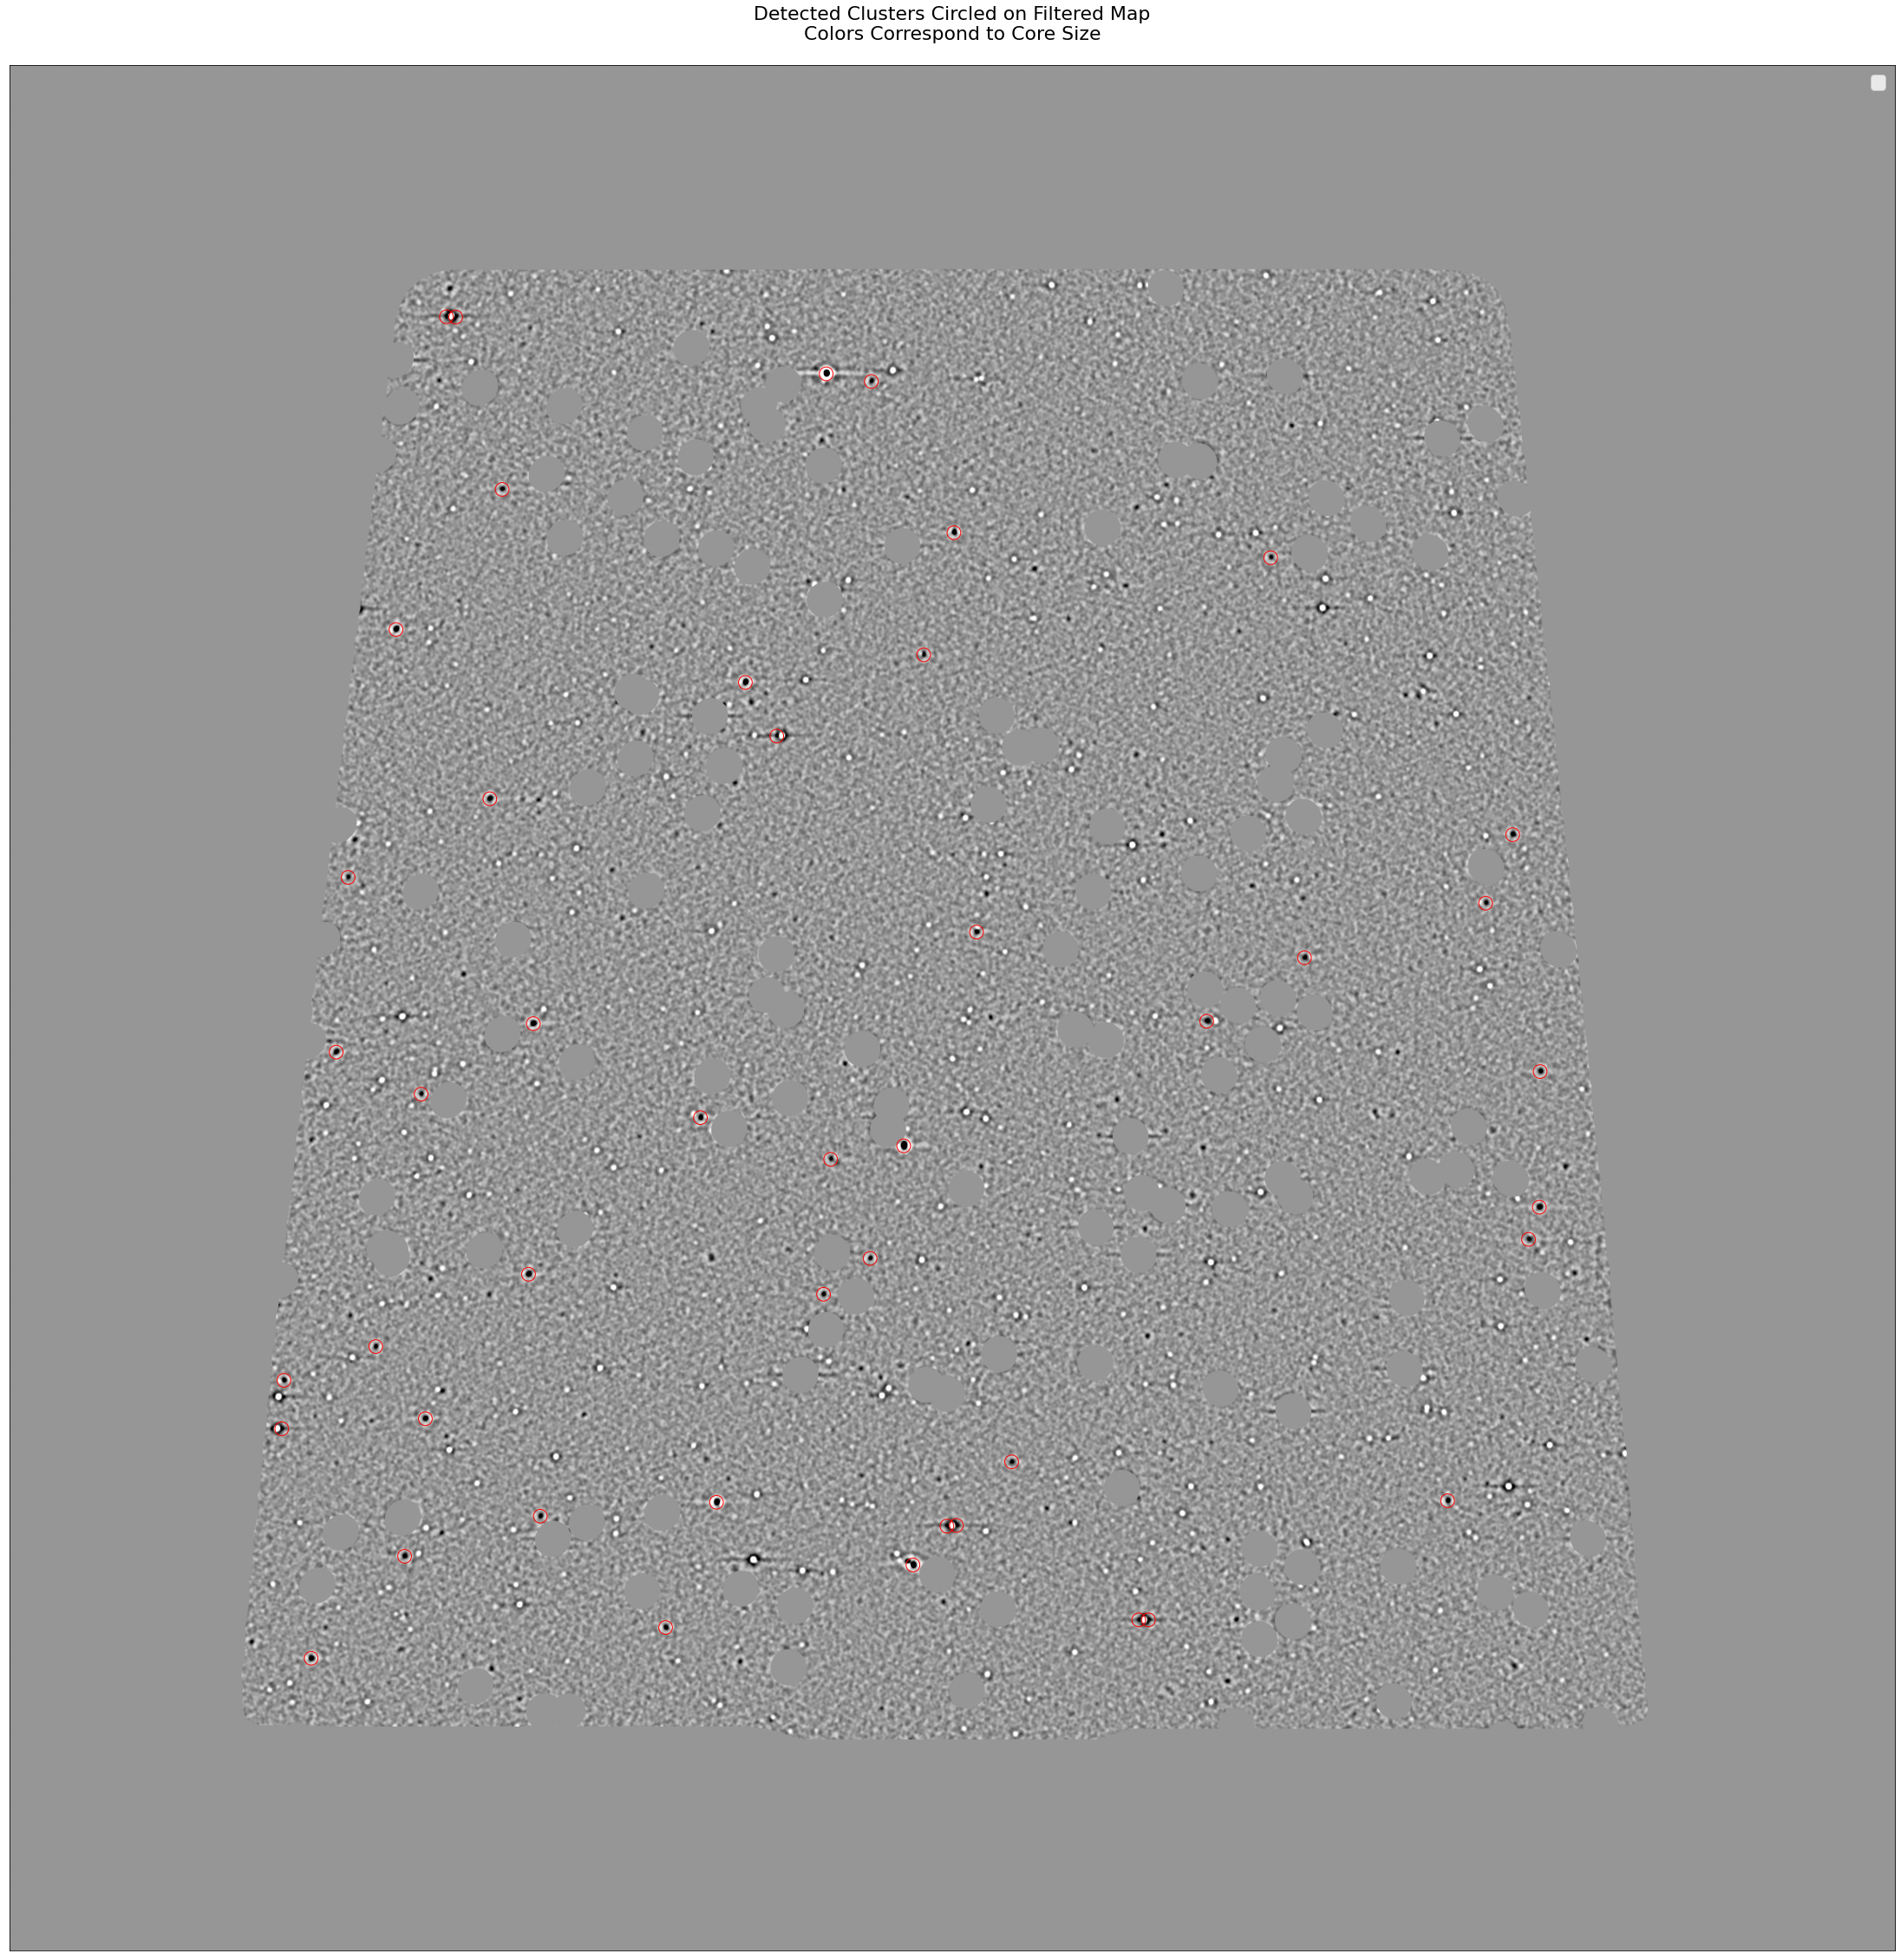

In [6]:
import importlib
importlib.reload(clusterfinder)

fields = ['3g90','3g150','3g220']
cf = clusterfinder.cluster_finder(fields, wi.final_setting_dic,units=global_units)
cf.make_fsz()
cf.make_maps(what_mask='milo_simple_mask')
cf.make_beams(theory=False)
cf.make_astro_noise()
cf.make_instr_noise()
cf.make_covar()
cf.find_clusters(sn_cutoff=10,tcs=1)
cf.plot_results()

Congrats you found clusters! Let's break down the functions and their optional inputs again: 

clusterfinder.cluster_finder: Initilization function. Optional inputs include:
psize: Defaults to 0.25 (arcmins).

make_fsz: Creates the scaling for the thermal SZ effect as a function of frequency. Optional inputs include:
do_rel: Defaults to False. If set to true, will preform a cluster finding search with the realitivistic correction for the tSZ. Please keep it false; the relativistic correction to the tSZ doesn't improve cluster finding search

rel_kev: Defaults to None. If you do choose to use the realtivistic scaling, it needs the temperature of the cluster (in keV) in order to calculate the realtivistic correction

make_maps: Loads in the maps from the wrapper function and creates a point source mask for clusterfinding. While this is currently not tested and fully optimized, the input is a string defining what type of point source mask you want. For not, please set this to 'no_mask'

make_beams: Loads in the beams from the wrapper function. Optional inputs include:
theory: Defaults to False. If set to true, will create a theoretical beam, similar to the wrapper function

make_astro_noise: Uses SPT3G software to load in the astrophysical foregrounds. Currently has no optional inputs

make_instrumental_noise: Loads in instrumental noise from the wrapper function. Currently has no optional inputs

make_covar: Makes the covariance matrix for clusterfinding

find_clusters: Does the cluster finding. Optional inputs include:
sn_cutoff: The cutoff S/N for cluster finding
tcs=1 The number of core sizes you want to iterate through. Defaults to 1 (0.25' core. Can go up to 12 to go to the 3' core)

do_cilc: Defaults to False. If you set to true, will preform a cILC deprojection rather than minimum variance. Not yet implemented, please set to false. 

# Cluster Crossmatching

This is the code that crossmatches your cluster catalog from above with recorded cluster catalogs. This is just a sanity check. Currently will cross match against the 2-year cluster finder results. Will flesh this out soon.

In [7]:
import crossmatch_clusters
ccc = crossmatch_clusters.compare_cluster_catalogs(cf,control_cat=cf.cat,file_name = None)
ccc.load_catalog(recorded_dic='josh_3g',custom_file_name=None,comparison_cat=None)
ccc.crossmatch()
ccc.get_stats()

Comparison Mean: 14.837
Control Mean: 17.3072
S/N Ratio: 1.199
Number of Matches: 36


# Source Subtraction

This code preform iterative source subtraction on input maps. Will write this full documentation soon.

First, run a point source finder on the maps in order to extract fluxes for source subtraction. 
Please only run one field at a time, otherwise the fluxes will not be accurate. In this example we will run 3g90 alone. 

Running the cluster finder for the fields: ['3g90']
Running the non-relativistic cluster finder
0.25
Finding Point Sources
Dividing by: 144210.00280578202
Dividing by: 144791.9159650431
Dividing by: 146500.92041037677
Dividing by: 146758.99244154838
Dividing by: 141339.65405647617
Dividing by: 145735.6430635873
Dividing by: 143794.0756641028
Dividing by: 144210.00280578202
Dividing by: 140843.12981374198
last bit


/home/mck74/code/spt3g_software/build/spt3g/sources/__init__.py:20: UserWarning: The spt3g.sources.source_utils library is deprecated, please fix your imports
  warnings.warn(f"The {modname} library is deprecated, please fix your imports")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


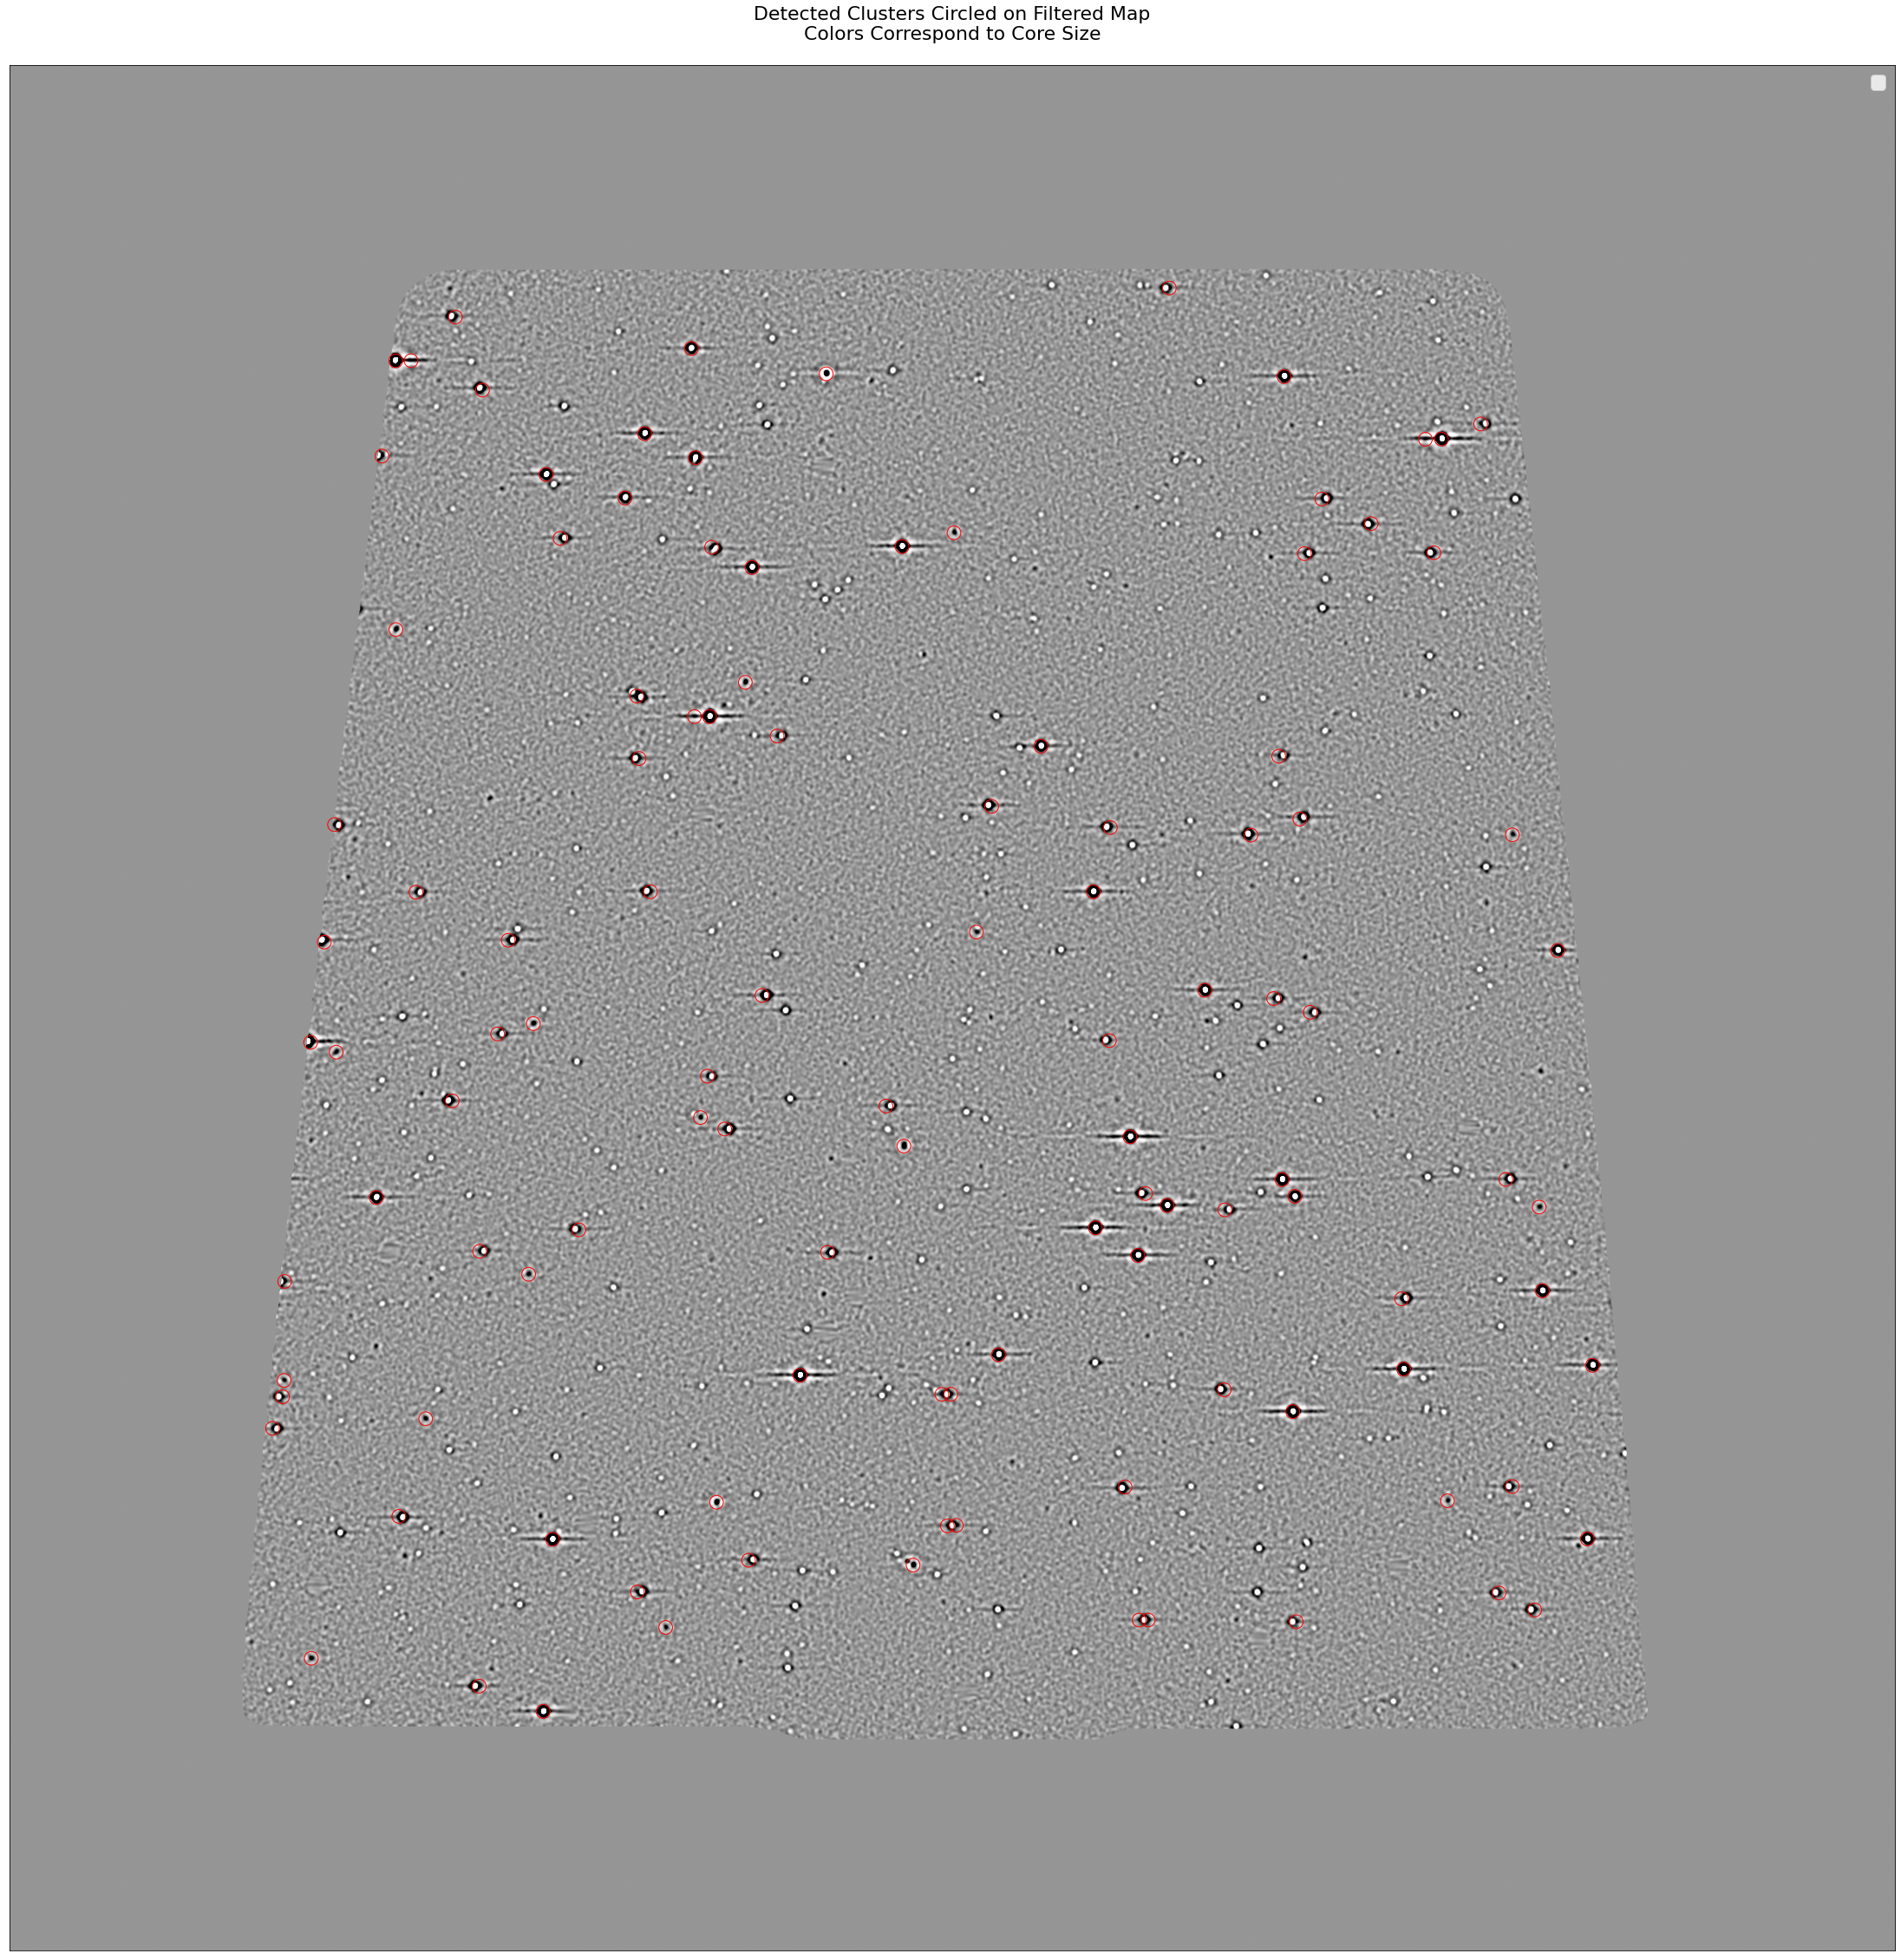

In [9]:
import importlib
importlib.reload(clusterfinder)

fields = ['3g90']
cf = clusterfinder.cluster_finder(fields, wi.final_setting_dic,units=global_units)
cf.make_fsz()
cf.make_maps(what_mask='no_mask')
cf.make_beams(theory=False)
cf.make_astro_noise()
cf.make_instr_noise()
cf.make_covar()
cf.find_clusters(sn_cutoff=10,tcs=1,point_source_finder=True)
cf.plot_results()

This is the source subtraction code. Right now, we are defaulting to only using Mel's v4 source list. The commented lines will run iterative source subtraction.

In [ ]:
#mel_flux = False
mel_flux = True


import source_subtraction
importlib.reload(source_subtraction)

ss = source_subtraction.source_subtraction(cf,what_field=fields[0],
                        sn_threshold = 5,
                        temp_threshold = 7,
                        mel_flux=mel_flux,
                        what_pts_file=None,
                        verbose=True)

ss.make_full_source_catalog()
ss.make_subfield_catalog()
ss.set_sn_threshold()
ss.remove_interpolated_sources()

if ss.mel_flux == False:
    ss.remove_double_sources()
    
ss.make_ss_template()
ss.run_ss(sn_thresholds=[0])

#ss.run_ss(sn_thresholds=[30,5.5,5,2,0])

Starting Source Subtraction
Using Mel Flux


Here is how I check residuals for the map. 

In [ ]:
import source_subtraction
importlib.reload(source_subtraction)
what_field = fields[0]
what_map = ss.ss

tss = source_subtraction.test_source_sub(cf,ss,what_map=what_field)
tss.rerun_map(matrix=what_map,scale=1)
tss.test_subtraction()
tss.make_plot('wing_sn', fields[0]+'_wing_sn',save_fig=False)

In [ ]:
tss.make_plot('cent_sn', fields[0]+'_cent_sn',save_fig=False)

In [ ]:
plt.rcParams['figure.figsize'] = (4,4)
bad_sources = []



for source in ss.sub_sources:
    x = ss.sub_sources[source]['x']
    y = ss.sub_sources[source]['y']
     #This is the bad source condition. You can play around with this. Now it's set to say that if a source's wing is above 3 sigma, it will flag it as an improperly subtracted source.
    if abs(tss.new_dic[source]['wing_sn']) > 3:
        bad_sources.append(source)    
        plt.imshow(cf.snmap,vmin=-10,vmax=10)
        plt.title(source)
        plt.xlim(x-50,x+50)
        plt.ylim(y-50,y+50)
        plt.show()